<a href="https://colab.research.google.com/github/choarauc/form/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving vehicle.csv to vehicle (1).csv


In [ ]:
import numpy as np
import pandas as pd

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt
%matplotlib inline 

#sv_data = pd.read_csv('vehicles_silhouette.csv', index_col = 'vehicule_id')
sv_data = pd.read_csv('vehicle.csv')

classes_vehicles = sv_data['class']

sv_data = sv_data.drop(['class'], axis = 1)

sv_data = sv_data.dropna().apply(np.int64)

In [ ]:
sv_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   compactness                  813 non-null    int64
 1   circularity                  813 non-null    int64
 2   distance_circularity         813 non-null    int64
 3   radius_ratio                 813 non-null    int64
 4   pr.axis_aspect_ratio         813 non-null    int64
 5   max.length_aspect_ratio      813 non-null    int64
 6   scatter_ratio                813 non-null    int64
 7   elongatedness                813 non-null    int64
 8   pr.axis_rectangularity       813 non-null    int64
 9   max.length_rectangularity    813 non-null    int64
 10  scaled_variance              813 non-null    int64
 11  scaled_variance.1            813 non-null    int64
 12  scaled_radius_of_gyration    813 non-null    int64
 13  scaled_radius_of_gyration.1  813 non-null    int64

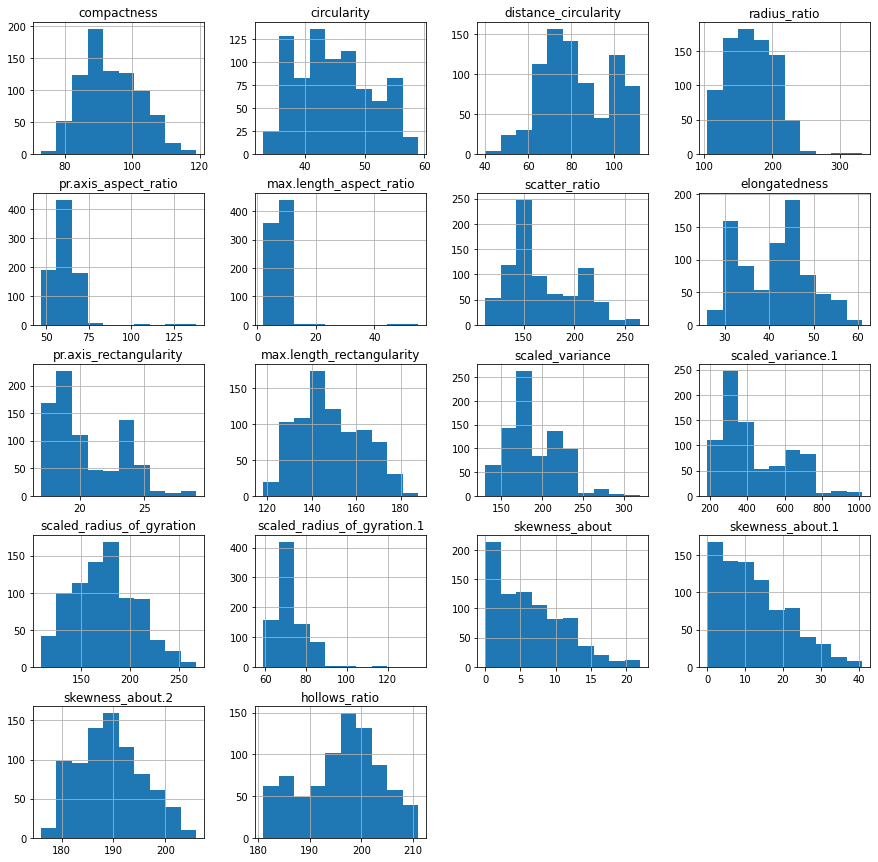

In [ ]:
sv_data.hist(figsize=(15,15))
plt.show()

In [ ]:
#(e) A l'aide d'un boxplot, comparer visuellement les distributions des variables numériques.

#plt.figure(figsize=(16, 9))
#plt.title('boxplot')
#plt.boxplot(sv_data)
#plt.show()

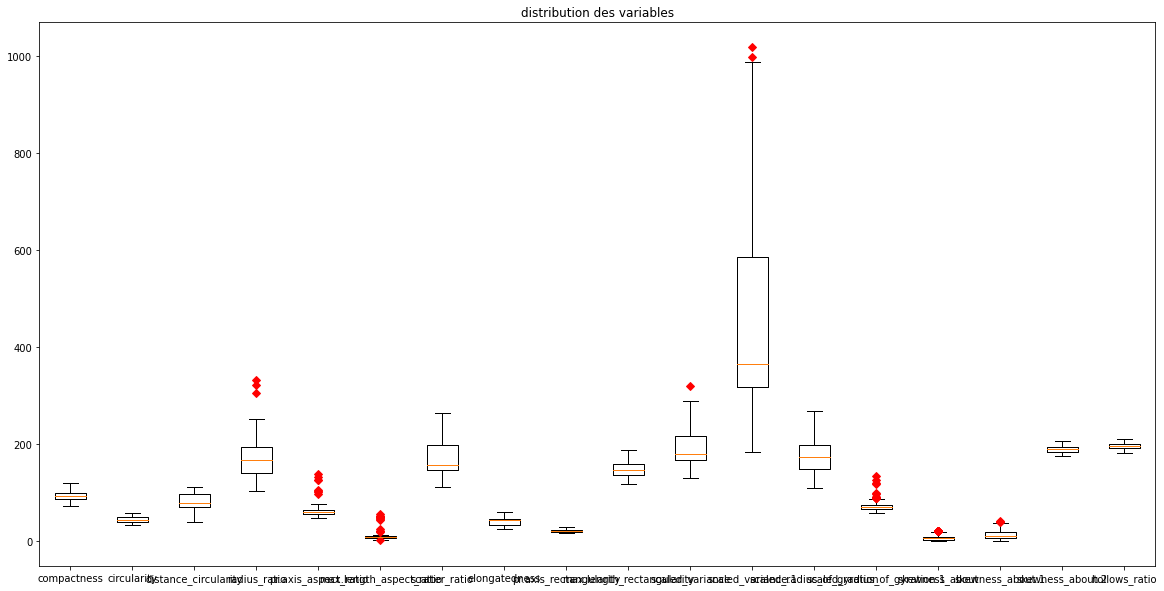

In [ ]:
plt.figure(figsize=(20, 10))
plt.title('distribution des variables')
plt.boxplot(sv_data.values, 0, 'rD', labels = list(sv_data.keys()))
plt.show()

In [ ]:
#(f) Effectuer une normalisation Min-Max sur les différentes variables de sv_data. On pourra utiliser la classe MinMaxScaler du sous-module sklearn.preprocessing.

In [ ]:
# Normalisation MinMax
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler().fit(sv_data)
sv_data_scaled = scaler.transform(sv_data)

In [ ]:
#(a) Appliquer un algorithme de KMeans sur sv_data en prenant 45 clusters.
#(b) Extraire les centroïdes des clusters produits par ce K-Means et les stocker dans une variable nommée centroid_kmeans1.
#(c) Pour chaque échantillon de sv_data, déterminer le cluster auquel il fait partie d'après le K-Means que vous venez d'entrâiner. Stocker les labels produits dans une variable nommée kmeans1_predictions.

In [ ]:
# Kmeans 45 clusters

K = 45

clf = KMeans(n_clusters = K )  
clf.fit(sv_data_scaled) 

kmeans1_predictions = clf.labels_
centroid_kmeans1 = clf.cluster_centers_  

print(centroid_kmeans1.shape)
print(kmeans1_predictions.shape)

(45, 18)
(813,)


In [ ]:
#(d) Afficher la répartition des observations par cluster. On pourra utiliser la méthode value_counts ou un histogramme. Est-ce que la répartition dans les différents clusters vous semble équilibrée?

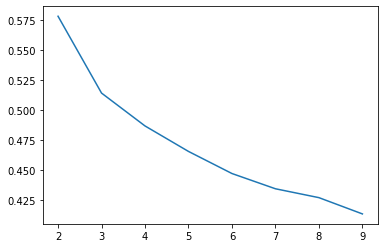

In [ ]:
from scipy.spatial.distance import cdist

liste_k = range(2,10)
distortion = []

for k in liste_k:
    cluster=KMeans(n_clusters=k)
    cluster.fit(sv_data_scaled)
    distortion.append(sum(np.min(cdist(sv_data_scaled,cluster.cluster_centers_,'euclidean'), axis=1))/ np.size(sv_data_scaled, axis=0))

plt.plot(liste_k, distortion);

# 3 ? 

In [ ]:
# PARTIE II

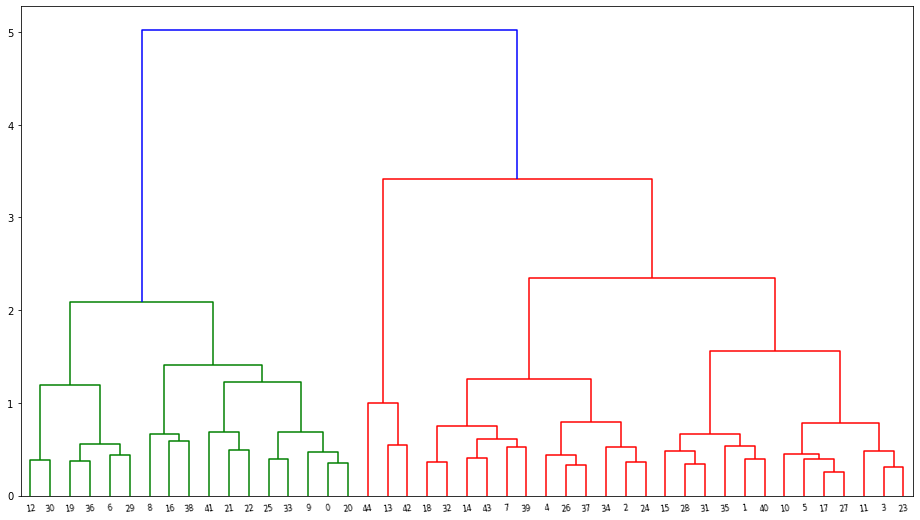

In [ ]:
#(a) Nous voulons maintenant regrouper les centroïdes obtenus en clusters, et non les échantillons. 
#Pour cela, construire un dendogramme à partir de centroid_kmeans1 pour déterminer un nombre de clusters optimal (strictement supérieur à 2). 
#Attribuer ce nombre de clusters à une variable nommée n_clusters_cah.

from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(centroid_kmeans1, method="ward", metric="euclidean")

plt.figure(figsize = (16,9))

dendrogram(Z,leaf_rotation=7);

In [ ]:
n_clusters_cah = 3

In [ ]:
#(b) Appliquer une classification ascendante hierarchique sur centroid_kmeans1 en utilisant le nombre de clusters optimal trouvé précédemment.
#Appliquer un algorithme de classification ascendante hiérarchique à partir des centres de gravité obtenus à l'étape 1 avec le nombre de clusters obtenu à l'étape 2.

#(c) Pour chaque centroïde de centroid_kmeans1, déterminer le cluster auquel il fait partie d'après la CAH que vous venez d'entrâiner (attribut labels_). 
#On stockera le résultat dans une variable nommée cah_clusters.

# Classification ascendante hiérarchique avec 3 clusters


clf_cah = AgglomerativeClustering(n_clusters = 3) # instanciation
clf_cah.fit(centroid_kmeans1) # clustering

cah_clusters = clf_cah.labels_

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0,
       2])

In [ ]:
#Nous devons à présent associer à chaque observation du jeu de départ un cluster issu de la CAH. Pour cela, nous devons:
#Associer chacune des observations de sv_data à un cluster du K-Means initial.
#Faire la correspondance entre les clusters du K-Means avec les clusters de la CAH pour associer un cluster CAH à chaque observation.


#(d) Grâce à kmneans1_predictions et cah_clusters, créer une colonne supplémentaire dans sv_data nommée 'cluster_CAH'. 
#Cette colonne contiendra le cluster CAH associé.

sv_data["kmeans_labels"] = kmeans1_predictions
sv_data["cluster_CAH"] = sv_data["kmeans_labels"].apply(lambda x : cah_clusters[x])

sv_data

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,kmeans_labels,cluster_CAH
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,3,0
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,18,0
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,6,1
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,24,0
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,42,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,22,1
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,3,0
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,29,1
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,7,0


In [ ]:
#Nous allons à présent pouvoir calculer les centroïdes de la classification hierarchique ascendante.

#(e) À l'aide de la méthode groupby, calculer les centroïdes de chaque cluster obtenus par CAH, 
#c'est-à-dire qu'il faudra calculer la moyenne de chaque colonne de sv_data en fonction de la valeur de la colonne "cluster_CAH". 
#On stockera le résultat dans une variable nommée centroids_cah.


centroids_cah = sv_data.drop("kmeans_labels", axis=1).groupby("cluster_CAH").mean()

In [ ]:
# (f) Supprimer la colonne "cluster_CAH" de sv_data.

sv_data = sv_data.drop(['cluster_CAH'], axis = 1)

sv_data

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,kmeans_labels
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,3
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,18
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,6
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,24
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,22
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,3
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,29
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,7


In [ ]:
#PARTIE III
# 4. Classification Mixte - 2e KMeans
#Dans cette partie, nous allons réentrainer un algorithme de KMeans en précisant cette fois de prendre les centroïdes calculés à l'étape précédente comme centroïdes initiaux.
# (a) Entraîner un algorithme K-Means sur sv_data en passant centroids_cah en argument du paramètre init de KMeans. Utiliser le nombre de clusters optimal trouvé pendant l'étape de la CAH.

#(c) Pour chaque échantillon de sv_data, déterminer le cluster auquel il fait partie d'après le K-Means que vous venez d'entrâiner. 
#Stocker les labels produits dans une variable nommée kmeans2_predictions.

kmeans_cah = KMeans(n_clusters=3, init=centroids_cah)
kmeans_cah.fit(sv_data[centroids_cah.columns])

sv_data["kmeans2_predictions"] = kmeans_cah.labels_

sv_data

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,kmeans_labels,cluster_CAH,kmeans2_predictions
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,3,0,0
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,18,0,0
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,6,1,1
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,24,0,0
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,42,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,22,1,0
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,3,0,0
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,29,1,1
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,7,0,0


In [ ]:
#5. Prédictions

#Dans un fichier nommé "classes_vehicles.csv", nous avons le type de véhicule pour chacune des observation de sv_data: 
#car, bus ou van. Nous allons déterminer si nos clusters sont bien représentatifs de ces étiquettes.

# (a) Lire le fichier "classes_vehicles.csv" dans un DataFrame nommé classes et en afficher les 5 premiéres lignes.

classes_vehicles

classes_vehicles = classes_vehicles.replace({"car":1,"bus":2,"van":0})

classes_vehicles=pd.DataFrame(classes_vehicles)

In [ ]:
#(b) En utilisant un tableau croisé, comparer les clusters trouvés grâce à la classification mixte avec les types de véhicules. 
#Déterminer quel cluster pourrait correspondre à chaque type de véhicule.

# Comparaison aux classes de véhicules 


df = pd.concat([sv_data, classes_vehicles], axis=1)
#df = df.rename({0:"labels"}, axis=1)

df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,kmeans_labels,cluster_CAH,kmeans2_predictions,class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,3.0,0.0,0.0,0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,18.0,0.0,0.0,0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,6.0,1.0,1.0,1
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,24.0,0.0,0.0,0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,42.0,2.0,2.0,2
